# Student Marks Prediction
Predict `grade` from `study_time_hours` using a simple linear regression. Includes data checks, evaluation (MAE, R²), residual visualization, and a fitted line overlay.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("data.csv")
df = df.dropna(subset=["study_time_hours","grade"])
print("Rows after dropna:", len(df))

Rows after dropna: 20


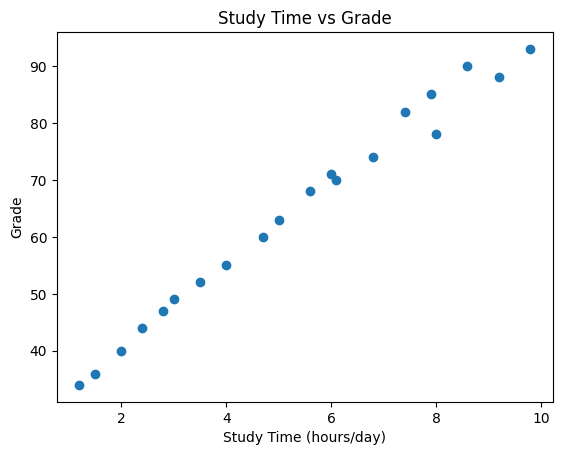

In [25]:
plt.scatter(df["study_time_hours"], df["grade"])
plt.xlabel("Study Time (hours/day)")
plt.ylabel("Grade")
plt.title("Study Time vs Grade")
plt.show()

In [26]:
X = df[["study_time_hours"]]
y = df["grade"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Slope (coef_):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (coef_): 6.926690244823678
Intercept: 27.45906671702779


In [28]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print("Sample predictions:", y_pred[:5])
print("R^2:", r2_score(y_test, y_pred))

Sample predictions: [35.77109501 44.0831233  48.23913745 46.8537994 ]
R^2: 0.9718498236577631


In [29]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.6903203653469774


c:\Users\mathe\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


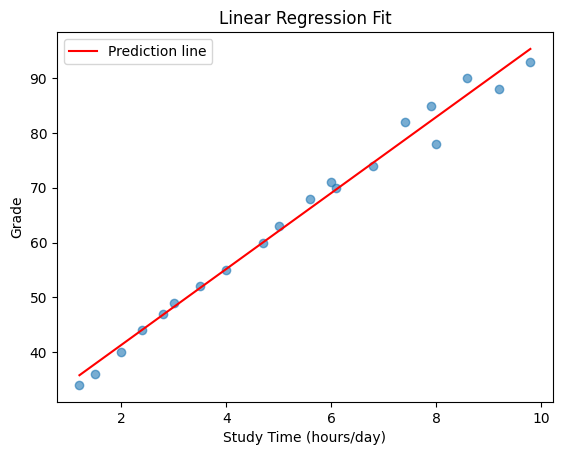

In [31]:
# Visualize Regression Fit
x_line = np.linspace(df["study_time_hours"].min(), df["study_time_hours"].max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.scatter(df["study_time_hours"], df["grade"], alpha=0.6)
plt.plot(x_line, y_line, color="red", label="Prediction line")
plt.xlabel("Study Time (hours/day)")
plt.ylabel("Grade")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [40]:
# Single-value prediction using matching feature name to avoid warning
new_study_time = pd.DataFrame({"study_time_hours": [9.2]})
predicted_grade = model.predict(new_study_time)
print("Predicted Grade:", float(predicted_grade[0]))

Predicted Grade: 91.18461696940562
